# Napovednik

## Podatki za obdelavo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from csv import DictReader

Ocene

In [3]:
data = np.loadtxt ('../ratingSAMPLE.csv', delimiter=",", skiprows=1)

Žanri

In [4]:
genresCSV = DictReader(open("../zanri/statistikaZanrov.csv", "rt", encoding = "utf-8"))

Pretvorim v lažjeuporabno obliko

In [5]:
genres=list()

for genreLine in genresCSV:
    genres.append(genreLine["zanr"])

Animeji (v surovi obliki)

In [6]:
animeDataReader = DictReader(open("../anime.csv", "rt", encoding = "utf-8"))

Dodeljevanje žanrov animejem

In [7]:
animeGenre=dict()

for row in animeDataReader:
    i=0
    rowGenres={}
    for genr in genres:
        i=i+1
        if genr in row["genre"]:
            rowGenres[genr]=True
        else:
            rowGenres[genr]=False
    animeGenre[row["anime_id"]]=rowGenres

Štetje žanrov

In [8]:
genreNum = {}

for genr in genres:
    genreNum[genr]=0
    
animeDataReader = DictReader(open("../anime.csv", "rt", encoding = "utf-8"))

for row in animeDataReader:
    for genr in genres:
        if animeGenre[row["anime_id"]][genr]:
            genreNum[genr]=genreNum[genr]+1

## Učna in testna množica

Bazo bom razdelil na 3 načine (spodaj navedena velikost rezine učne množice):
 * SLearn: 1/4 učna
 * MLearn: 1/2 učna
 * LLearn: 2/3 učna


In [32]:
dataUnclean=data
data=data[data[:,2]!=-1]

dataLearn={}
dataTest={}

dataLearn['S'] = np.array(data[0:len(data)/4])
dataTest['S'] = np.array(data[len(data)/4:len(data)])
dataLearn['M'] = np.array(data[0:len(data)/2])
dataTest['M'] = np.array(data[len(data)/2:len(data)])
dataLearn['L'] = np.array(data[0:(2*len(data)/3)])
dataTest['L'] = np.array(data[(2*len(data)/3):len(data)])

C:\Users\Sniper43\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Sniper43\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Sniper43\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Sniper43\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Sniper43\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Sniper43\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: V

## Kontrolni razred

Kot kontrolni razred bom uporabil dodeljevanje povprečnega ratinga vsem animejem.

In [33]:
avgRating={}
for lrnSize in ['S','M','L']:
    avgRating[lrnSize]=sum(dataLearn[lrnSize][:,2])/len(dataLearn[lrnSize])
    print(avgRating[lrnSize])

7.83203125
7.87683576985
7.86392013127


Prva metrika: MSE

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import brier_score_loss

In [35]:
pred={}
mseR={}
brierS={}
for lrnSize in ['S','M','L']:
    pred[lrnSize]=np.ones(len(dataTest[lrnSize]))*avgRating[lrnSize]
    mseR[lrnSize] = mean_squared_error(dataTest[lrnSize][:,2],pred[lrnSize])
    #brierS[lrnSize] = brier_score_loss(dataTest[lrnSize][:,2], pred[lrnSize])  

In [36]:
for lrnSize in ['S','M','L']:
    print(mseR[lrnSize])

2.29892939184
2.31259267875
2.3503440939


## Naive Bayes

Z uporabo NB bom nad izbranimi spremenljivkami naredil napoved

In [37]:
from sklearn.naive_bayes import GaussianNB

In [55]:
gnb = {}

allSizes=['S','M','L']
selectSizes=['L']
predGNB={}
for lrnSize in allSizes:
    gnb[lrnSize]=GaussianNB()
    predGNB[lrnSize]= gnb[lrnSize].fit(dataLearn[lrnSize], dataLearn[lrnSize][:,2])

makePredGNB={}
for lrnSize in allSizes:
    makePredGNB[lrnSize]=predGNB[lrnSize].predict(dataTest[lrnSize])

gnbMSE={}
for lrnSize in allSizes:
    gnbMSE[lrnSize] = mean_squared_error(dataTest[lrnSize][:,2],makePredGNB[lrnSize])
for lrnSize in allSizes:
    print(gnbMSE[lrnSize])

0.00466067596567
0.0
0.0


## Beta Fitting

In [25]:
from scipy.stats import beta

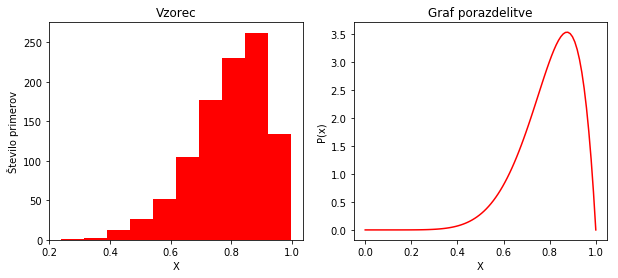

In [26]:
a=8
b=2
n=1000

sample=beta.rvs(a, b, size=n)

xr = np.linspace(0, 1, 100)# interval X 
P  = [beta.pdf(x, a, b) for x in xr]  # porazdelitvena funkcija

# Histogram - porazdelitev naključlnih VZORCEV x glede na P(x)


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Vzorec")
plt.hist(sample, color="red")
plt.xlabel("X")
plt.ylabel("Število primerov")

# Graf porazdelitvene funkcije
plt.subplot(1, 2, 2)
plt.title("Graf porazdelitve")
plt.plot(xr, P, color="red")   # nariši P(x)
plt.ylabel("P(x)")
plt.xlabel("X")
plt.show()

C:\Users\Sniper43\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:407: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*sqrt(a + b + 1) / (a + b + 2) / sqrt(a*b)


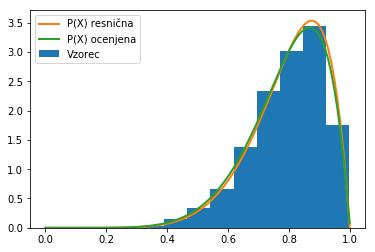

In [27]:
parameters = beta.fit(sample)
P_fit = [beta.pdf(x, *parameters) for x in xr ]

plt.figure()
plt.hist(sample,    label="Vzorec", normed=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)   # ocenjena porazdelitev je model
plt.legend()
plt.show()